### **What are the patterns/behavior of churned users? What are your suggestions to the company to reduce churned users.**

**1. Data Preprocessing**

In [68]:
# import file from google drive
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
df=pd.read_excel('/content/drive/MyDrive/Data Analyst Coaching/Machine Learning/churn_prediction.xlsx',"Sheet1")
print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4         

In [69]:
# Explore data
print(type(df))
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
         CustomerID        Churn       Tenure     CityTier  WarehouseToHome  \
count   5630.000000  5630.000000  5366.000000  5630.000000      5379.000000   
mean   52815.500000     0.168384    10.189899     1.654707        15.639896   
std     1625.385339     0.374240     8.557241     0.915389         8.531475   
min    50001.000000     0.000000     0.000000     1.000000         5.000000   
25%    51408.250000     0.000000     2.000000     1.000000         9.000000   
50%    52815.500000     0.000000     9.000000     1.000000        14.000000   
75%    54222.750000     0.000000    16.000000     3.000000        20.000000   
max    55630.000000     1.000000    61.000000     3.000000       127.000000   

       HourSpendOnApp  NumberOfDeviceRegistered  SatisfactionScore  \
count     5375.000000               5630.000000        5630.000000   
mean         2.931535                  3.688988           3.066785   
std          0.721926                  1

In [70]:
# Check imbalanced data
imbalanced_data=len(df[df['Churn']==1])/df['Churn'].count()*100
imbalanced_data

16.838365896980463

--> The data is quite imbalenced

In [71]:
# Drop the duplicated values
df.drop_duplicates()
# Missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

1. We have 7 columns that have missing values. The amount of missing values is large --> Do not remove --> Replace with other value
2. All missing values is numeric value --> Replace with median




In [72]:
# Replace the missing values
df['HourSpendOnApp']=df['HourSpendOnApp'].fillna(df['HourSpendOnApp'].median())
df['OrderAmountHikeFromlastYear']=df['OrderAmountHikeFromlastYear'].fillna(df['OrderAmountHikeFromlastYear'].median())
df['Tenure']=df['Tenure'].fillna(df['Tenure'].median())
df['WarehouseToHome']=df['WarehouseToHome'].fillna(df['WarehouseToHome'].median())
df['CouponUsed']=df['CouponUsed'].fillna(df['CouponUsed'].median())
df['OrderCount']=df['OrderCount'].fillna(df['OrderCount'].median())
df['DaySinceLastOrder']=df['DaySinceLastOrder'].fillna(df['DaySinceLastOrder'].median())
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5630 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5630 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5630 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

<ipython-input-73-a3ec91836355>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="YlGnBu", annot=True, ax=ax)


<Axes: >

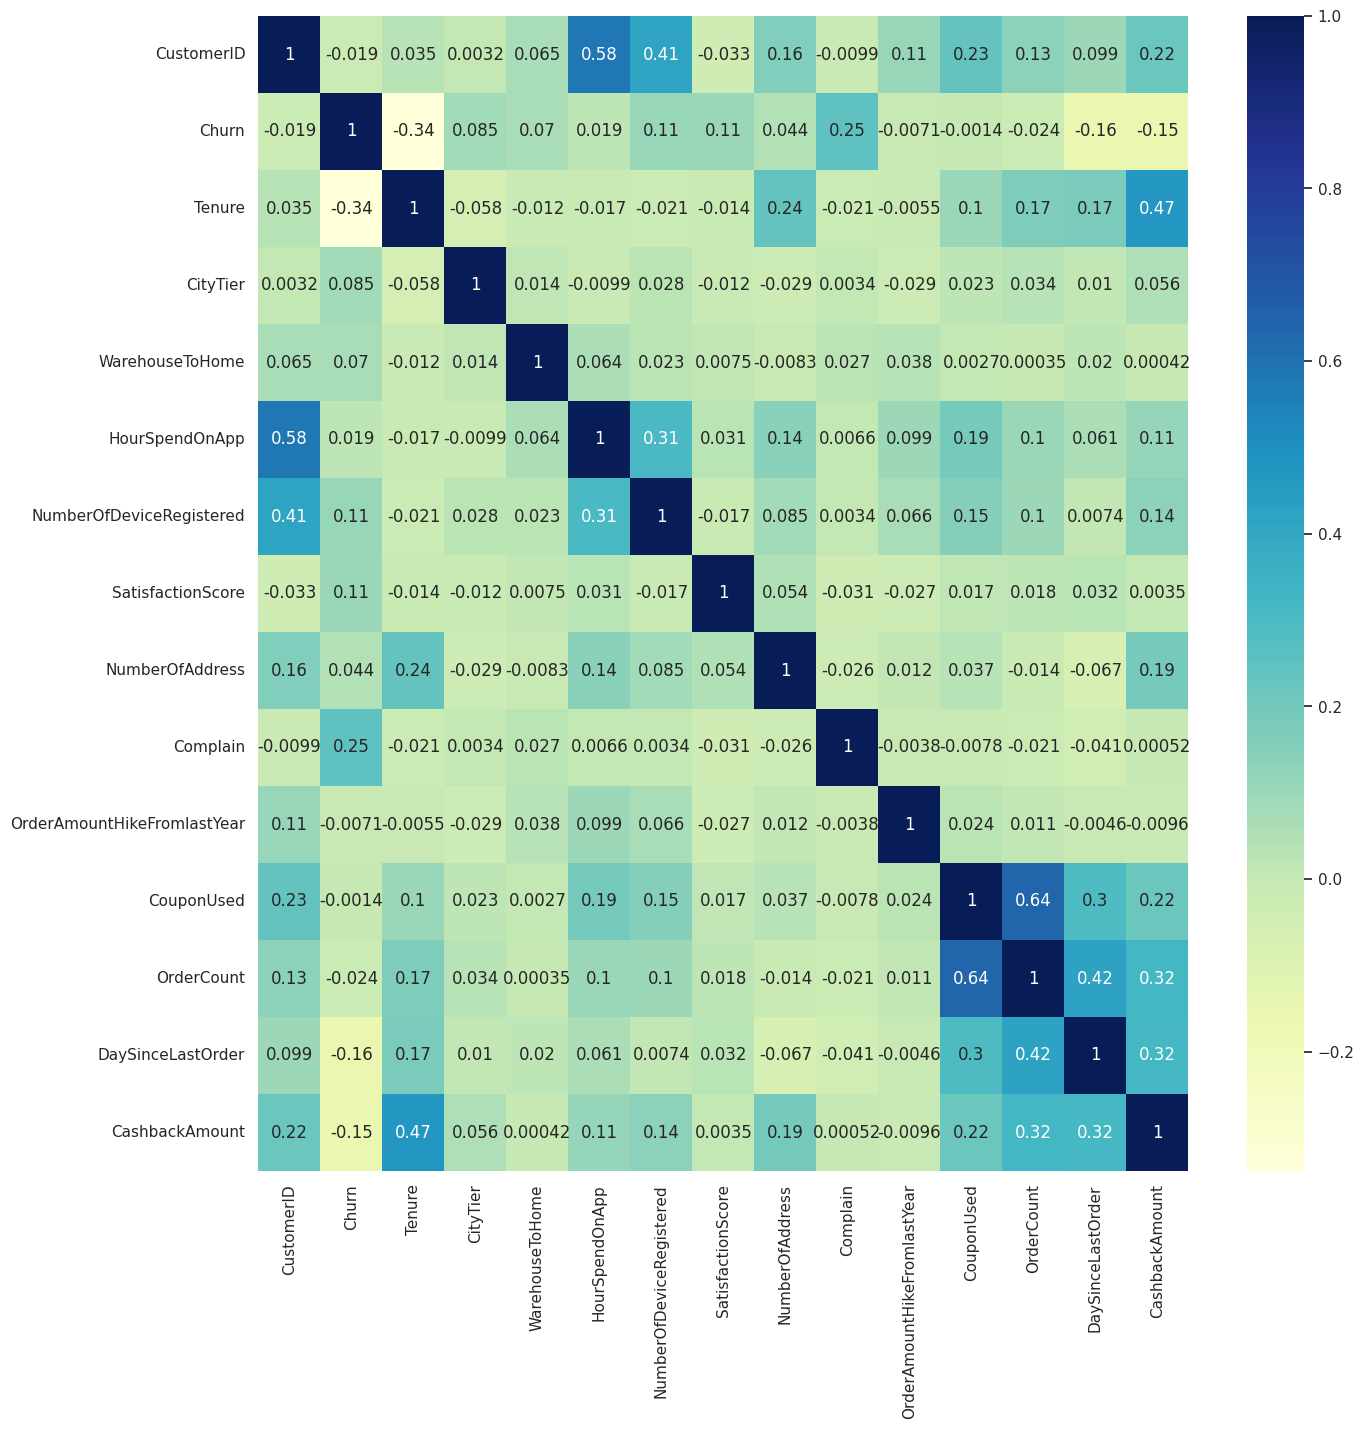

In [73]:
# Check correlation between numeric values
import pandas as pd
import seaborn as sns
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True, ax=ax)

In [74]:
# Replace Mobile Phone to Phone in PreferredLoginDevice column
df['PreferredLoginDevice'].replace({'Mobile Phone':'Phone'}, inplace=True)
# Replace CC to Credit Card, COD to Cash on Delivery in PreferredPaymentMode column
df['PreferredPaymentMode'].replace({'CC':'Credit Card','COD':'Cash on Delivery'}, inplace=True)

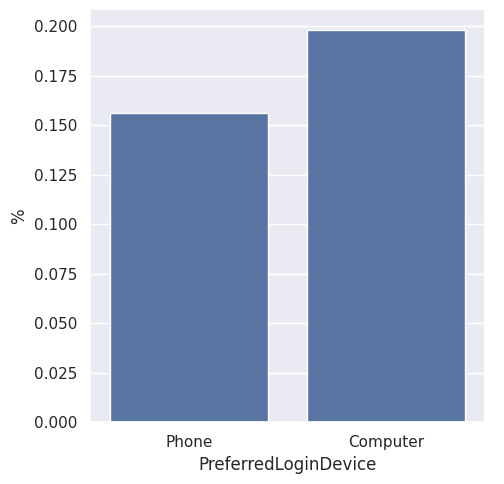

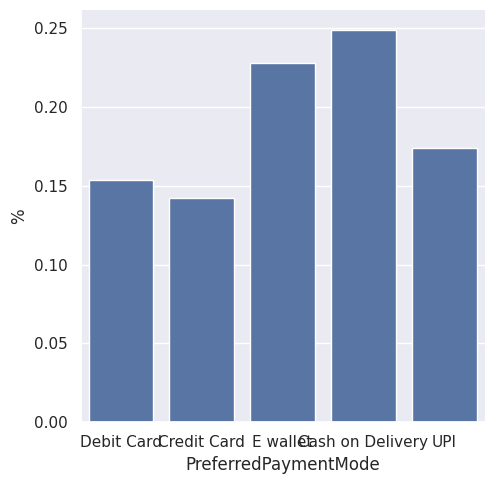

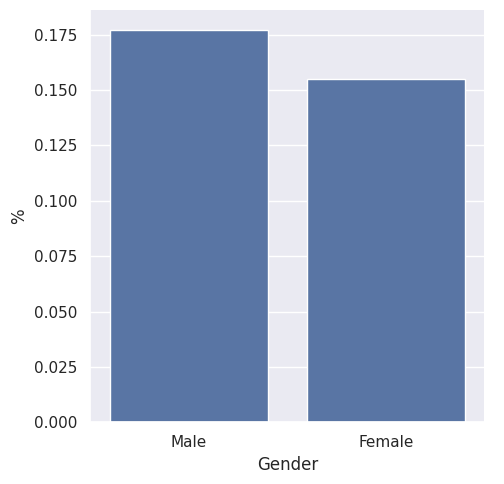

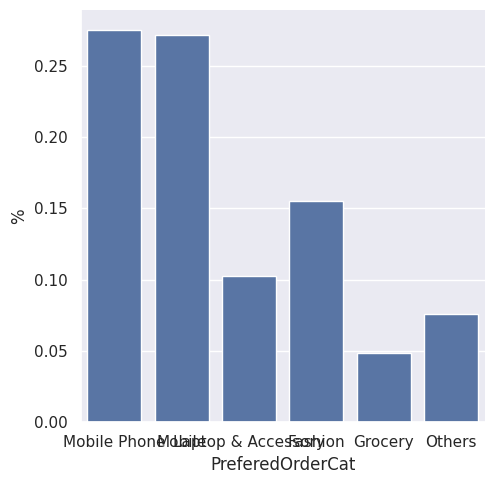

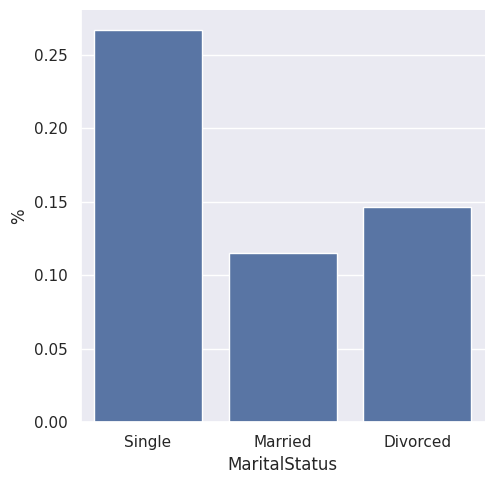

In [75]:
# Check percentage of churn over total
def count_percentage(df, column, target, count):
    '''
    This function to create the table calculate the percentage of churn/not churn transaction on total transaction group by category values

    Input: df: dataframe
    column: the category column need to be groupby
    target: the target column
    count: the column to count the transactions
    '''

    # Create 2 dataframes of churn and not churn
    churn = df[df['Churn']==1].groupby(column)[[count]].count().reset_index().sort_values(ascending=False, by = count)
    not_churn = df[df['Churn']==0].groupby(column)[[count]].count().reset_index().sort_values(ascending=False, by = count)

    #Merge 2 dataframe into one:
    cate_df = churn.merge(not_churn, on = column , how = 'outer')
    cate_df = cate_df.fillna(0)
    cate_df.rename(columns = {count+'_x':'churn',count+'_y':'not_churn'}, inplace = True)

    #Caculate the percentage:
    cate_df['%'] = cate_df['churn']/(cate_df['churn']+cate_df['not_churn'])

    return cate_df
# Check percentage of churn over total
PreferredLoginDevice_per=count_percentage(df,'PreferredLoginDevice','Churn','CustomerID')
PreferredPaymentMode_per=count_percentage(df,'PreferredPaymentMode','Churn','CustomerID')
Gender_per=count_percentage(df,'Gender','Churn','CustomerID')
PreferedOrderCat_per=count_percentage(df,'PreferedOrderCat','Churn','CustomerID')
MaritalStatus_per=count_percentage(df,'MaritalStatus','Churn','CustomerID')
# Visualization
import matplotlib.pyplot as plt
PreferredLoginDevice_plot=sns.catplot(x=PreferredLoginDevice_per['PreferredLoginDevice'],y=PreferredLoginDevice_per['%'],kind='bar')
PreferredPaymentMode_plot=sns.catplot(x=PreferredPaymentMode_per['PreferredPaymentMode'],y=PreferredPaymentMode_per['%'],kind='bar')
Gender_plot=sns.catplot(x=Gender_per['Gender'],y=Gender_per['%'],kind='bar')
PreferedOrderCat_plot=sns.catplot(x=PreferedOrderCat_per['PreferedOrderCat'],y=PreferedOrderCat_per['%'],kind='bar')
MaritalStatus_plot=sns.catplot(x=MaritalStatus_per['MaritalStatus'],y=MaritalStatus_per['%'],kind='bar')
plt.show()

**Conclusion about the behavior of churned users:**
* They usually are in single status
* They have more complains than others
* They usually are new users
* They receive less cashback amount than others
* They refer to by Mobile Phone category
* They refer to use COD payment method


**Suggestions:**
* We can have more promotions or special discounts for new users
* We can offer them more product related to Mobile Phone category

### **Build the Machine Learning model for predicting churned users.**

**2.1 Logistic Regression Model**

After EDA, we will keep the below columns to the model:


*   Tenure, Complain, DaySinceLastOrder, CashbackAmount: have high correlation (0.34, 0.25, 0.16 and 0.15)
*   PreferredPaymentMode, PreferedOrderCat, MaritalStatus: the categories have big different percentage of churn users



In [76]:
df_lr_model=df[['Churn','Tenure','Complain','DaySinceLastOrder','CashbackAmount','PreferredPaymentMode','PreferedOrderCat','MaritalStatus']]
df_lr_model.head()

,Churn,Tenure,Complain,DaySinceLastOrder,CashbackAmount,PreferredPaymentMode,PreferedOrderCat,MaritalStatus
0,1,4.0,1,5.0,159.93,Debit Card,Laptop & Accessory,Single
1,1,9.0,1,0.0,120.90,UPI,Mobile,Single
2,1,9.0,1,3.0,120.28,Debit Card,Mobile,Single
3,1,0.0,0,3.0,134.07,Debit Card,Laptop & Accessory,Single
4,1,0.0,0,3.0,129.60,Credit Card,Mobile,Single


In [77]:
# Encoding
list_lr_columns1 = ['PreferredPaymentMode','PreferedOrderCat','MaritalStatus']
df_lr_model1 = pd.get_dummies(df_lr_model, columns = list_lr_columns1)
df_lr_model1

,Churn,Tenure,Complain,DaySinceLastOrder,CashbackAmount,PreferredPaymentMode_Cash on Delivery,PreferredPaymentMode_Credit Card,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,1,4.0,1,5.0,159.93,0,0,1,0,0,0,0,1,0,0,0,0,0,1
1,1,9.0,1,0.0,120.90,0,0,0,0,1,0,0,0,1,0,0,0,0,1
2,1,9.0,1,3.0,120.28,0,0,1,0,0,0,0,0,1,0,0,0,0,1
3,1,0.0,0,3.0,134.07,0,0,1,0,0,0,0,1,0,0,0,0,0,1
4,1,0.0,0,3.0,129.60,0,1,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,10.0,0,4.0,150.71,0,1,0,0,0,0,0,1,0,0,0,0,1,0
5626,0,13.0,0,3.0,224.91,0,1,0,0,0,1,0,0,0,0,0,0,1,0
5627,0,1.0,1,4.0,186.42,0,0,1,0,0,0,0,1,0,0,0,0,1,0
5628,0,23.0,0,9.0,178.90,0,1,0,0,0,0,0,1,0,0,0,0,1,0


In [78]:
# Normalizing
list_lr_columns2 = df_lr_model1.columns.tolist()

from sklearn.preprocessing import MinMaxScaler

filter_df_lr = df_lr_model1[list_lr_columns2]
scaler = MinMaxScaler()
model=scaler.fit(filter_df_lr)
scaled_data=model.transform(filter_df_lr)

df_lr_model2 = pd.DataFrame(scaled_data, columns = list_lr_columns2)
df_lr_model2

,Churn,Tenure,Complain,DaySinceLastOrder,CashbackAmount,PreferredPaymentMode_Cash on Delivery,PreferredPaymentMode_Credit Card,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,1.0,0.065574,1.0,0.108696,0.492107,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.147541,1.0,0.000000,0.372011,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.147541,1.0,0.065217,0.370104,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.000000,0.0,0.065217,0.412536,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.000000,0.0,0.065217,0.398782,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0.0,0.163934,0.0,0.086957,0.463737,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5626,0.0,0.213115,0.0,0.065217,0.692052,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5627,0.0,0.016393,1.0,0.086957,0.573618,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5628,0.0,0.377049,0.0,0.195652,0.550478,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [79]:
# Apply model
from sklearn.model_selection import train_test_split
x=df_lr_model2.drop('Churn', axis = 1)
y=df_lr_model2[['Churn']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


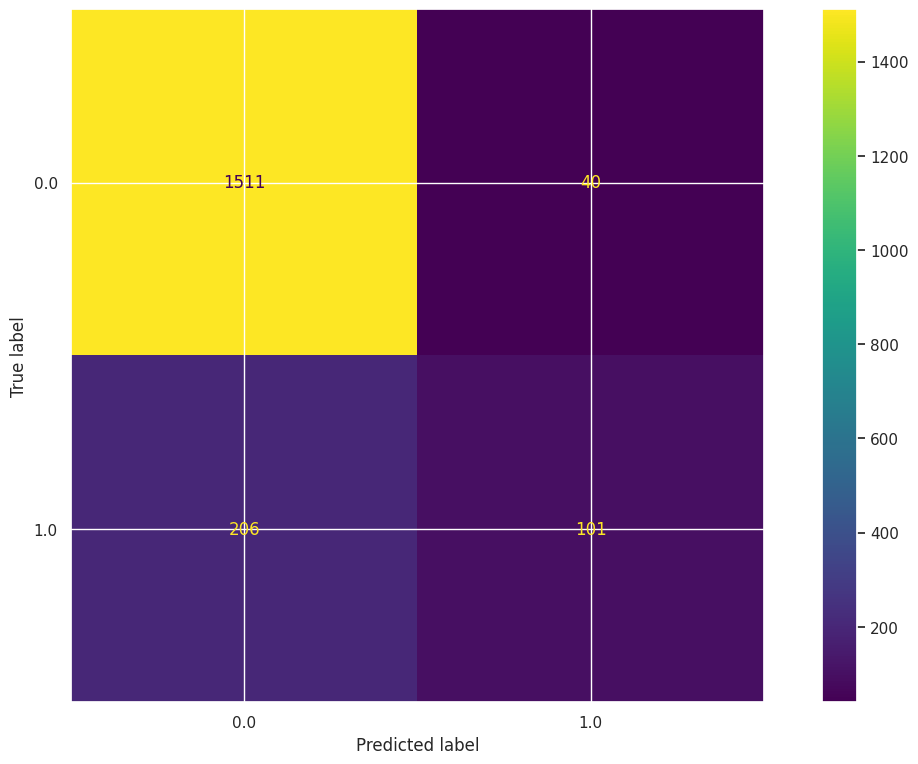

In [80]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

clf_logis = LogisticRegression(random_state = 0)
clf_logis.fit(x_train, y_train)

y_lr_pre_test = clf_logis.predict(x_test)
y_lr_pre_train = clf_logis.predict(x_train)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_lr_pre_test, labels=clf_logis.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_logis.classes_)

disp.plot()

In [81]:
from sklearn.metrics import balanced_accuracy_score

print(f'Balance accuracy of train set: {balanced_accuracy_score(y_train,y_lr_pre_train)}')
print(f'Balance accuracy of test set: {balanced_accuracy_score(y_test,y_lr_pre_test)}')

Balance accuracy of train set: 0.6714900215299573
Balance accuracy of test set: 0.6516002074945869


**2.2 Decision Tree Model**

In [82]:
# Encoding
list_columns1=['PreferredLoginDevice','PreferredPaymentMode','Gender','PreferedOrderCat','MaritalStatus']

df_model1 = pd.get_dummies(df, columns = list_columns1)
df_model1


,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,...,Gender_Male,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,50001,1,4.0,3,6.0,3.0,3,2,9,1,...,0,0,0,1,0,0,0,0,0,1
1,50002,1,9.0,1,8.0,3.0,4,3,7,1,...,1,0,0,0,1,0,0,0,0,1
2,50003,1,9.0,1,30.0,2.0,4,3,6,1,...,1,0,0,0,1,0,0,0,0,1
3,50004,1,0.0,3,15.0,2.0,4,5,8,0,...,1,0,0,1,0,0,0,0,0,1
4,50005,1,0.0,1,12.0,3.0,3,5,3,0,...,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,1,30.0,3.0,2,1,6,0,...,1,0,0,1,0,0,0,0,1,0
5626,55627,0,13.0,1,13.0,3.0,5,5,6,0,...,1,1,0,0,0,0,0,0,1,0
5627,55628,0,1.0,1,11.0,3.0,2,4,3,1,...,1,0,0,1,0,0,0,0,1,0
5628,55629,0,23.0,3,9.0,4.0,5,4,4,0,...,1,0,0,1,0,0,0,0,1,0


In [83]:
# Normalizing
list_columns2 = df_model1.columns.tolist()

from sklearn.preprocessing import MinMaxScaler

filter_df= df_model1[list_columns2]
scaler = MinMaxScaler()
model= scaler.fit(df_model1)
scaled_data=model.transform(filter_df)

df_model2 = pd.DataFrame(scaled_data, columns = list_columns2)
df_model2

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,...,Gender_Male,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0.000000,1.0,0.065574,1.0,0.008197,0.6,0.4,0.25,0.380952,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.000178,1.0,0.147541,0.0,0.024590,0.6,0.6,0.50,0.285714,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.000355,1.0,0.147541,0.0,0.204918,0.4,0.6,0.50,0.238095,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.000533,1.0,0.000000,1.0,0.081967,0.4,0.6,1.00,0.333333,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.000711,1.0,0.000000,0.0,0.057377,0.6,0.4,1.00,0.095238,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0.999289,0.0,0.163934,0.0,0.204918,0.6,0.2,0.00,0.238095,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5626,0.999467,0.0,0.213115,0.0,0.065574,0.6,0.8,1.00,0.238095,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5627,0.999645,0.0,0.016393,0.0,0.049180,0.6,0.2,0.75,0.095238,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5628,0.999822,0.0,0.377049,1.0,0.032787,0.8,0.8,0.75,0.142857,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [84]:
from sklearn.model_selection import train_test_split
x2=df_model2.drop('Churn', axis = 1)
y2=df_model2[['Churn']]

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.33, random_state=42)

In [85]:
from sklearn import tree
clf_des=tree.DecisionTreeClassifier()
clf_des.fit(x_train,y_train)

y_tree_pre_train=clf_des.predict(x_train)
y_tree_pre_test=clf_des.predict(x_test)

print(f'Balance accuracy of train set: {balanced_accuracy_score(y_train,y_tree_pre_train)}')
print(f'Balance accuracy of test set: {balanced_accuracy_score(y_test,y_tree_pre_test)}')

Balance accuracy of train set: 0.999219968798752
Balance accuracy of test set: 0.8829713728875139


**2.3 Random Forest Model**

In [86]:
from sklearn.ensemble import RandomForestClassifier
clf_rand = RandomForestClassifier(max_depth=2,random_state=0)
clf_rand.fit(x2_train,y2_train)
y_ranf_pre_train=clf_rand.predict(x2_train)
y_ranf_pre_test=clf_rand.predict(x2_test)

<ipython-input-86-67cb02a1f588>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_rand.fit(x2_train,y2_train)


In [87]:
print(f'Balance accuracy of train set: {balanced_accuracy_score(y_train,y_ranf_pre_train)}')
print(f'Balance accuracy of test set: {balanced_accuracy_score(y_test,y_ranf_pre_test)}')

Balance accuracy of train set: 0.5
Balance accuracy of test set: 0.5


In [88]:
# Enhanced Random Forest model
feats={} # a dict to hold feature_name: feature_importance
for feature, importance in zip(x_test, clf_rand.feature_importances_):
  feats[feature]=importance # add the name/value pair
importances=pd.DataFrame.from_dict(feats,orient='index').rename(columns={0:'Gini-importance'})
importances=importances.sort_values(by='Gini-importance',ascending=True)
importances=importances.reset_index()

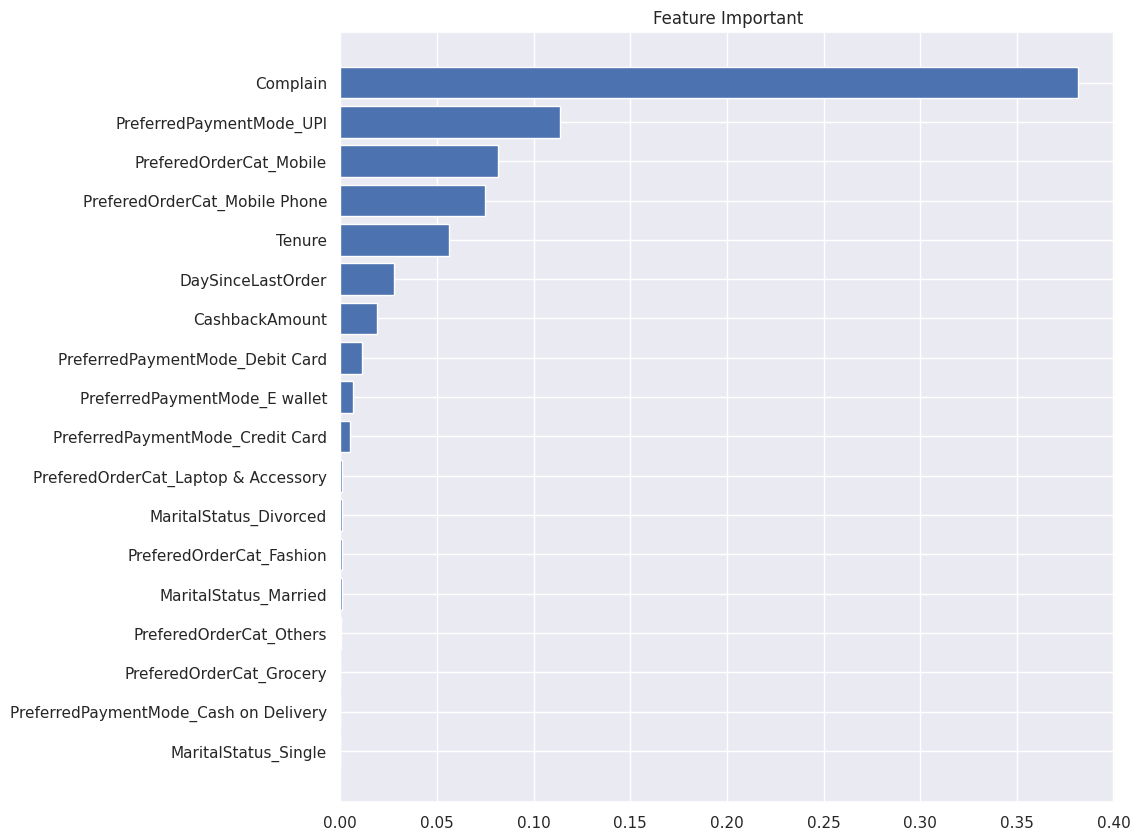

In [89]:
# Create bar chart
plt.figure(figsize=(10,10))
plt.barh(importances.tail(20)['index'][:20],importances.tail(20)['Gini-importance'])
plt.title('Feature Important')
plt.show()